<a href="https://colab.research.google.com/github/IfenaikeElias/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will start by importing all necessary libaries for this project.

In [ ]:
#import all necessary libaries
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

Extract and load data for four stock including Apple, Google, Microsoft, and Amazon from Yahoo finance API.


We are interested with working with stock price, so we extract Adjusted closing price of stocks as a new dataframe called `price`

In [ ]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2010-01-01', end='2024-07-28', interval='1d')
prices = data['Adj Close']
log_return = np.log(1 + prices.pct_change()).dropna()

data.head(3)

[*********************100%***********************]  4 of 4 completed


Price                     Adj Close                                   Close  \
Ticker                         AAPL    AMZN      GOOGL       MSFT      AAPL   
Date                                                                          
2010-01-04 00:00:00+00:00  6.454505  6.6950  15.645692  23.347326  7.643214   
2010-01-05 00:00:00+00:00  6.465664  6.7345  15.576794  23.354866  7.656429   
2010-01-06 00:00:00+00:00  6.362820  6.6125  15.184124  23.211536  7.534643   

Price                                                        High          \
Ticker                       AMZN      GOOGL       MSFT      AAPL    AMZN   
Date                                                                        
2010-01-04 00:00:00+00:00  6.6950  15.684434  30.950001  7.660714  6.8305   
2010-01-05 00:00:00+00:00  6.7345  15.615365  30.959999  7.699643  6.7740   
2010-01-06 00:00:00+00:00  6.6125  15.221722  30.770000  7.686786  6.7365   

Price                      ...        Low                 Open          \
Ticker                     ...      GOOGL       MSFT      AAPL    AMZN   
Date                       ...                                           
2010-01-04 00:00:00+00:00  ...  15.621622  30.590000  7.622500  6.8125   
2010-01-05 00:00:00+00:00  ...  15.554054  30.639999  7.664286  6.6715   
2010-01-06 00:00:00+00:00  ...  15.174174  30.520000  7.656429  6.7300   

Price                                               Volume             \
Ticker                         GOOGL       MSFT       AAPL       AMZN   
Date                                                                    
2010-01-04 00:00:00+00:00  15.689439  30.620001  493729600  151998000   
2010-01-05 00:00:00+00:00  15.695195  30.850000  601904800  177038000   
2010-01-06 00:00:00+00:00  15.662162  30.879999  552160000  143576000   

Price                                           
Ticker                         GOOGL      MSFT  
Date                                            
2010-01-04 00:00:00+00:00   78169752  38409100  
2010-01-05 00:00:00+00:00  120067812  49749600  
2010-01-06 00:00:00+00:00  158988852  58182400  

[3 rows x 24 columns]

We will go ahead to check column names to understand how data is structured.

In [ ]:
#check column names
data.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume', 'GOOGL'),
            (   'Volume',  'MSFT')],
           names=['Price', 'Ticker'])

We will be simualating 2000 random portfolios and the  risk free rate as at the time of implementation of this project is 0.0035

In [ ]:
# Set parameters
num_of_simulated_portfolio = 2000
number_of_stocks = len(prices.columns)
risk_free_rate = 0.035


In [ ]:
prices.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2010-01-04 00:00:00+00:00,6.454505,6.6950,15.645692,23.347326
2010-01-05 00:00:00+00:00,6.465664,6.7345,15.576794,23.354866
2010-01-06 00:00:00+00:00,6.362820,6.6125,15.184124,23.211536
2010-01-07 00:00:00+00:00,6.351056,6.5000,14.830644,22.970146
2010-01-08 00:00:00+00:00,6.393283,6.6760,15.028353,23.128559


We will check for any correlation between the change in stock prices of 4 selected stocks over the given time period using a correlation matrix that matches two stocks with a correlation coefficient (pearson).

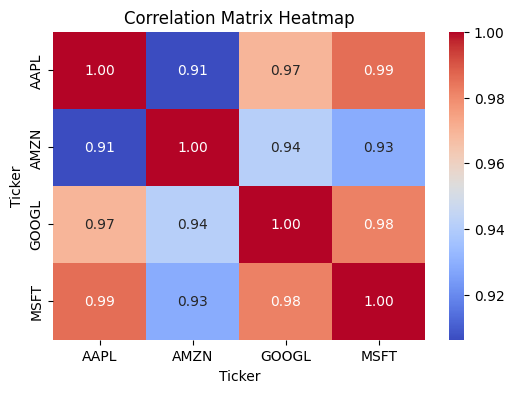

In [ ]:
#save correlation dataframe
df_ = prices
correlation_matrix = df_.corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


from the correlation matrix we can observe that there is a lot of correlation between the change in price of the selected stocks over time.


In [ ]:
number_of_stocks

4

we will calculate log return

In [ ]:
#calculate the log of returns

'''
log return captures better return over time
'''

log_return = np.log(1 + prices.pct_change())

Assign random weights to the simulated portfolio.

In [ ]:
random_weights = np.random.random(number_of_stocks)

Normalize portfolio weights.

In [ ]:
#we want all wait to sum up to 1, we can transform weight to rebound weights
random_weights = random_weights/ np.sum(random_weights)

In [ ]:
random_weights

array([0.24401536, 0.38893944, 0.04190289, 0.32514231])

we can go ahead to calculate the average annual expected return on a single simulated portfolio.

In [ ]:
#calculate the average annual expected return
expected_return = np.sum((log_return.mean() * random_weights)*252)

In [ ]:
expected_return

0.21914867494987378

We can go ahead to calculate other metrics like:

*   `Portfolio Variance`  :
*   `Covariance Matrix` :
*   `Portfolio_volatility` :
*   `Sharpe ratio` :






In [ ]:
#calculate the expected volatity
import numpy as np

# Assume log_returns is a DataFrame of log returns of assets
cov_matrix = log_return.cov()
portfolio_variance = np.dot(random_weights.T, np.dot(cov_matrix*252, random_weights))



In [ ]:
cov_matrix

Ticker,AAPL,AMZN,GOOGL,MSFT
Ticker,,,,
AAPL,0.000313,0.000176,0.000168,0.000169
AMZN,0.000176,0.000424,0.000212,0.000189
GOOGL,0.000168,0.000212,0.000295,0.000179
MSFT,0.000169,0.000189,0.000179,0.000262


In [ ]:
# Portfolio volatility (standard deviation)
portfolio_volatility = np.sqrt(portfolio_variance)
print(f"Expected Portfolio Volatility: {portfolio_volatility:.4f}")


Expected Portfolio Volatility: 0.2430


In [ ]:
#calculate the sharpe ratio
sharpe_ratio = (expected_return - risk_free_rate)/portfolio_volatility

In [ ]:
sharpe_ratio

0.7578023118220104

## **Monte Carlo simulation**
Monte Carlo Simulation is a statistical technique used to model and analyze the impact of risk and uncertainty in decision-making processes. It uses random sampling and statistical modeling to estimate possible outcomes of an uncertain event or process. The method encompasses any technique of statistical sampling employed to approximate solutions to quantitative problems.

>  `log_return` : DataFrame of log returns.

>  `cov_matrix` : Covariance matrix.

>   `number_of_stocks` : Number of stocks in the portfolio.

>   `num_of_simulated_portfolio` : Number of portfolios to simulate.
















In [ ]:
''' Initialize arrays to store the results'''

#create an array for storing simulation weights
simulation_weights = np.zeros((num_of_simulated_portfolio, number_of_stocks))

#create an array for storing returns
returns = np.zeros(num_of_simulated_portfolio)

#create an array for storing volatilities
volatilities = np.zeros(num_of_simulated_portfolio)

#create an array for storing sharpe ratios for each simulation
sharpe_ratios = np.zeros(num_of_simulated_portfolio)


In [ ]:
# Simulate portfolios
for i in range(num_of_simulated_portfolio):
    # Generate random portfolio weights
    simulation_weight = np.random.random(number_of_stocks)
    simulation_weight /= np.sum(simulation_weight)  # Normalize to sum to 1

    # Store the generated weights
    simulation_weights[i, :] = simulation_weight

    # Calculate the portfolio return
    returns[i] = np.sum(log_return.mean() * simulation_weight * 252)  # Assuming 252 trading days in a year

    # Calculate the portfolio volatility
    volatilities[i] = np.sqrt(np.dot(simulation_weight.T, np.dot(cov_matrix * 252, simulation_weight)))

    # Calculate the Sharpe ratio
    if volatilities[i] != 0:
        sharpe_ratios[i] = (returns[i] - risk_free_rate) / volatilities[i]
    else:
        sharpe_ratios[i] = 0  # Avoid division by zero


In [ ]:
# Convert results into a DataFrame
simulation = pd.DataFrame({
    'Returns': returns,
    'Volatility': volatilities,
    'Sharpe_Ratio': sharpe_ratios
})


In [ ]:
simulation.head(4)

,Returns,Volatility,Sharpe_Ratio
0,0.228883,0.242791,0.798561
1,0.203751,0.244469,0.690275
2,0.207584,0.231501,0.745502
3,0.199215,0.251629,0.652610


In [ ]:
# Find the portfolio with the maximum Sharpe ratio
max_sharpe_idx = simulation['Sharpe_Ratio'].idxmax()
max_sharpe_ratio_portfolio = simulation.loc[max_sharpe_idx]



In [ ]:
# Find the portfolio with the minimum volatility
min_volatility_idx = simulation['Volatility'].idxmin()
min_volatility_portfolio = simulation.loc[min_volatility_idx]


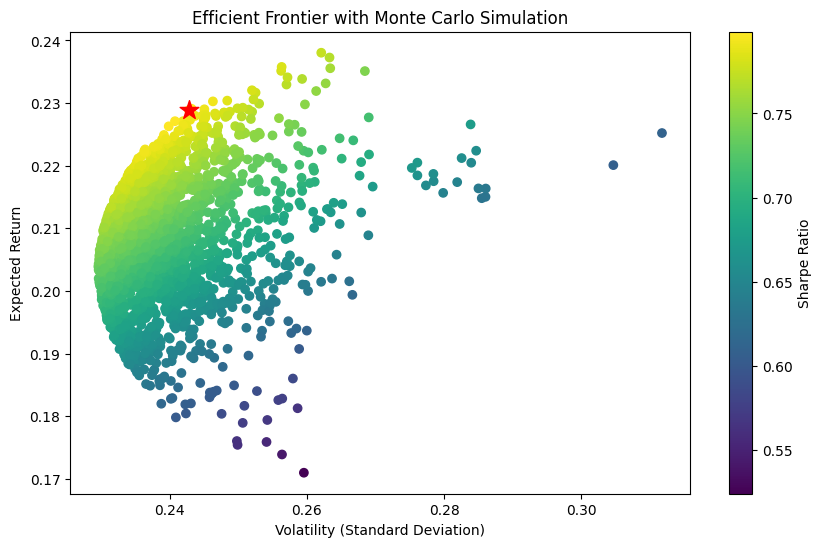

In [ ]:

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)
max_sharpe_return = returns[max_sharpe_idx]
max_sharpe_volatility = volatilities[max_sharpe_idx]

plt.figure(figsize=(10, 6))
plt.scatter(volatilities, returns, c=sharpe_ratios, cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=200)  # Highlight max Sharpe ratio
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Monte Carlo Simulation')
plt.show()


In [ ]:
# Visualization
fig = go.Figure()

# Scatter plot for all portfolios
fig.add_trace(go.Scatter(
    x=volatilities,
    y=returns,
    mode='markers',
    marker=dict(
        color=sharpe_ratios,  # Color by Sharpe Ratio
        colorscale='Viridis',
        size=10,
        showscale=True,
        colorbar=dict(title="Sharpe Ratio")
    ),
    name='Portfolios'
))

# Highlight the portfolio with the maximum Sharpe ratio
fig.add_trace(go.Scatter(
    x=[max_sharpe_ratio_portfolio['Volatility']],
    y=[max_sharpe_ratio_portfolio['Returns']],
    mode='markers',
    marker=dict(
        color='red',
        size=15,
        symbol='star'
    ),
    name='Max Sharpe Ratio Portfolio'
))

# Highlight the portfolio with the minimum volatility
fig.add_trace(go.Scatter(
    x=[min_volatility_portfolio['Volatility']],
    y=[min_volatility_portfolio['Returns']],
    mode='markers',
    marker=dict(
        color='blue',
        size=15,
        symbol='star'
    ),
    name='Min Volatility Portfolio'
))

# Update layout
fig.update_layout(
    title='Efficient Frontier with Monte Carlo Simulation',
    xaxis_title='Volatility (Standard Deviation)',
    yaxis_title='Expected Return',
    legend=dict(x=0.8, y=1.1),
    width=800,
    height=600
)

# Show plot
fig.show()


In [ ]:
# Create a DataFrame to summarize the key metrics
summary = pd.DataFrame({
    'Metric': ['Expected Return', 'Volatility', 'Sharpe Ratio'],
    'Max Sharpe Ratio Portfolio': [
        max_sharpe_ratio_portfolio['Returns'],
        max_sharpe_ratio_portfolio['Volatility'],
        max_sharpe_ratio_portfolio['Sharpe_Ratio']
    ],
    'Min Volatility Portfolio': [
        min_volatility_portfolio['Returns'],
        min_volatility_portfolio['Volatility'],
        min_volatility_portfolio['Sharpe_Ratio']
    ]
})

# Display the summary table
print(summary)


            Metric  Max Sharpe Ratio Portfolio  Min Volatility Portfolio
0  Expected Return                    0.228883                  0.203907
1       Volatility                    0.242791                  0.229583
2     Sharpe Ratio                    0.798561                  0.735713


In [ ]:
stock_names = list(prices.columns)


# Create a DataFrame for the portfolio weights of Max Sharpe and Min Volatility portfolios
weights_df = pd.DataFrame({
    'Stock': stock_names,
    'Max Sharpe Ratio Portfolio Weights': simulation_weights[max_sharpe_idx],
    'Min Volatility Portfolio Weights': simulation_weights[min_volatility_idx]
})

# Display the portfolio weights table
print(weights_df)


   Stock  Max Sharpe Ratio Portfolio Weights  Min Volatility Portfolio Weights
0   AAPL                            0.532107                          0.284136
1   AMZN                            0.248070                          0.066073
2  GOOGL                            0.003393                          0.258503
3   MSFT                            0.216430                          0.391288


In [ ]:
import plotly.graph_objects as go

# Create a summary table with Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['Metric', 'Max Sharpe Ratio Portfolio', 'Min Volatility Portfolio'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[
        ['Expected Return', 'Volatility', 'Sharpe Ratio'],
        [
            max_sharpe_ratio_portfolio['Returns'],
            max_sharpe_ratio_portfolio['Volatility'],
            max_sharpe_ratio_portfolio['Sharpe_Ratio']
        ],
        [
            min_volatility_portfolio['Returns'],
            min_volatility_portfolio['Volatility'],
            min_volatility_portfolio['Sharpe_Ratio']
        ]
    ],
    fill_color='lavender',
    align='left'))
])

fig.show()


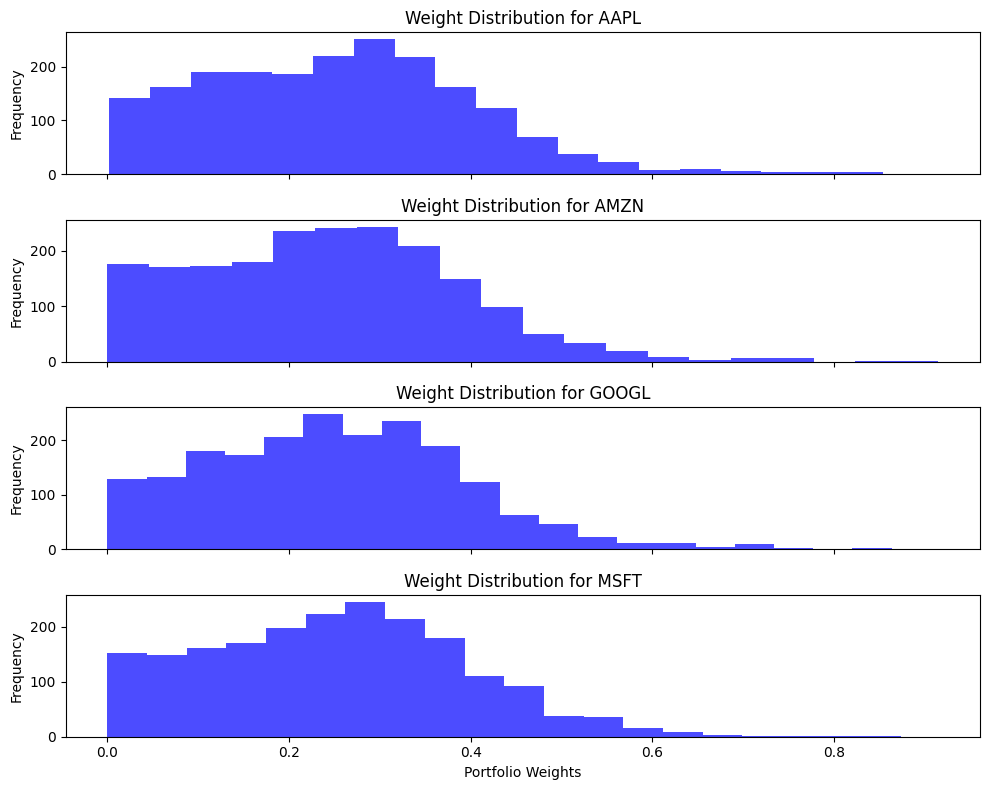

In [ ]:
# Create subplots for each stock's weight distribution
fig, axes = plt.subplots(nrows=len(stock_names), ncols=1, figsize=(10, 8), sharex=True)

for i, stock in enumerate(stock_names):
    axes[i].hist(simulation_weights[:, i], bins=20, alpha=0.7, color='blue')
    axes[i].set_title(f'Weight Distribution for {stock}')
    axes[i].set_ylabel('Frequency')

plt.xlabel('Portfolio Weights')
plt.tight_layout()
plt.show()


# **Genetic algorithm for Portfolio Optimization**





In [4]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.0 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
import yfinance as yf


# parameters
num_of_pop = 2500
num_of_gen = 100
crossover_prob = 0.66  # Set based on Optuna tuning
mutation_rate = 0.1287  # Set based on Optuna tuning
risk_free_rate = 0.035
num_of_stocks = len(tickers)

# covariance matrix of the log returns
cov_matrix = log_return.cov()

# fitness function for DEAP
def fitness_function(portfolio_weights):
    weights = np.array(portfolio_weights)
    portfolio_return = np.sum(log_return.mean() * weights * 252)  # annualize return
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights)) * 252  # annualize variance
    sharpe_ratio = (portfolio_return - risk_free_rate) / np.sqrt(portfolio_variance)
    volatility = np.sqrt(portfolio_variance)
    return sharpe_ratio, volatility

# DEAP setup for multi-objective optimization
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))  # Maximize Sharpe Ratio, Minimize Volatility
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr_weight", lambda: np.random.random())
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_weight, n=num_of_stocks)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=crossover_prob)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=1, eta=1.0, indpb=mutation_rate)
toolbox.register("select", tools.selNSGA2)  # NSGA2 for multi-objective selection

#  weights nominalization
def normalize_weights(individual):
    total = sum(individual)
    for i in range(len(individual)):
        individual[i] /= total

# Genetic Algorithm Execution
population = toolbox.population(n=num_of_pop)

for generation in range(num_of_gen):
    for individual in population:
        normalize_weights(individual)

    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if np.random.rand() < crossover_prob:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if np.random.rand() < mutation_rate:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    population[:] = offspring

# Gather the best solutions
valid_population = [ind for ind in population if len(ind.fitness.values) == 2]

best_sharpe_portfolio = tools.selBest(valid_population, 1, fit_attr='fitness')[0]
best_volatility_portfolio = min(valid_population, key=lambda ind: ind.fitness.values[1])

# Display the best portfolios
print("Best Portfolio for Max Sharpe Ratio:", [round(w, 4) for w in best_sharpe_portfolio])
print("Best Sharpe Ratio:", fitness_function(best_sharpe_portfolio)[0])

print("Best Portfolio for Min Volatility:", [round(w, 4) for w in best_volatility_portfolio])
print("Min Volatility:", fitness_function(best_volatility_portfolio)[1])


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Best Portfolio for Max Sharpe Ratio: [0.6176, 0.3057, -0.2332, 0.3099]
Best Sharpe Ratio: 0.8075752143811405
Best Portfolio for Min Volatility: [0.2719, 0.0823, 0.2887, 0.3571]
Min Volatility: 0.229640997626126


In [8]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assume `valid_population` contains the final population from the genetic algorithm
# and `fitness_function` calculates the sharpe_ratio and volatility for a given portfolio

# Store returns and volatility for each portfolio in the population
returns = []
volatility = []

for individual in valid_population:
    sharpe, vol = fitness_function(individual)
    returns.append(sharpe)
    volatility.append(vol)

# Plotly setup
fig = go.Figure()

# Scatter plot for portfolios
fig.add_trace(go.Scatter(
    x=volatility,
    y=returns,
    mode='markers',
    marker=dict(
        color=returns,  # color by returns (or Sharpe Ratio)
        colorscale='Viridis',
        colorbar=dict(title="Sharpe Ratio"),
        showscale=True,
        size=7,
        opacity=0.8
    ),
    name='Portfolios'
))

# Annotate best Sharpe Ratio and Minimum Volatility portfolios
best_sharpe_idx = np.argmax(returns)
best_volatility_idx = np.argmin(volatility)

fig.add_trace(go.Scatter(
    x=[volatility[best_sharpe_idx]],
    y=[returns[best_sharpe_idx]],
    mode='markers',
    marker=dict(color='red', size=12, symbol='star'),
    name='Max Sharpe Ratio'
))

fig.add_trace(go.Scatter(
    x=[volatility[best_volatility_idx]],
    y=[returns[best_volatility_idx]],
    mode='markers',
    marker=dict(color='blue', size=12, symbol='star'),
    name='Min Volatility'
))

# Layout details with x-axis range set to [0, 1]
fig.update_layout(
    title="Efficient Frontier",
    xaxis_title="Volatility (Risk)",
    yaxis_title="Expected Return",
    xaxis_range=[0, 1],  # Setting the x-axis range to 0-1
    legend=dict(x=0.85, y=0.85),
    template="plotly_white"
)

# Show the plot
fig.show()
